## Exploratory data analysis (EDA)
### BinanceCoin (BNB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [4]:
df = pd.read_csv('DATA\\registros_binancecoin.csv')
df = df.drop(columns='Unnamed: 0')
df
moneda = 'binancecoin'

##  Analisis General

In [3]:
# Una descripcion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1826 non-null   object 
 1   price               1826 non-null   float64
 2   market_caps         1826 non-null   float64
 3   total_volumes       1826 non-null   float64
 4   Circulating supply  1826 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.5+ KB


Se observa que no hay valores faltantes, la fecha esta en tipo object, se cambiara a timestamp

In [4]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1826 non-null   datetime64[ns]
 1   price               1826 non-null   float64       
 2   market_caps         1826 non-null   float64       
 3   total_volumes       1826 non-null   float64       
 4   Circulating supply  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.5 KB


veamos si hay registros duplicados

In [5]:
df.duplicated().sum()

0

cada registro del dataframe es unico

In [19]:
#ahora veamos unas estadisticas generales del dataframe

df.describe()

,price,market_caps,total_volumes,Circulating supply
count,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03
mean,185.943641,2.975572e+10,1.050844e+09,1.534063e+08
std,180.964845,2.946782e+10,1.615325e+09,1.111455e+07
min,4.470332,6.459512e+08,7.692710e+06,9.542714e+07
25%,18.154894,2.748882e+09,2.212355e+08,1.477785e+08
50%,195.953147,3.047343e+10,4.540906e+08,1.542988e+08
75%,314.071706,4.970878e+10,1.285280e+09,1.627375e+08
max,675.098974,1.104412e+11,2.210352e+10,1.696306e+08


## Analisis univariable
Se hara un boxplot por cada variable en busca de outliers

<Axes: >

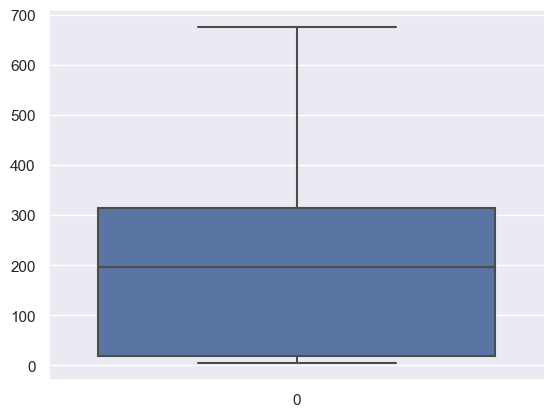

In [4]:
#rangos del precio
sns.boxplot(df['price'])

<Axes: >

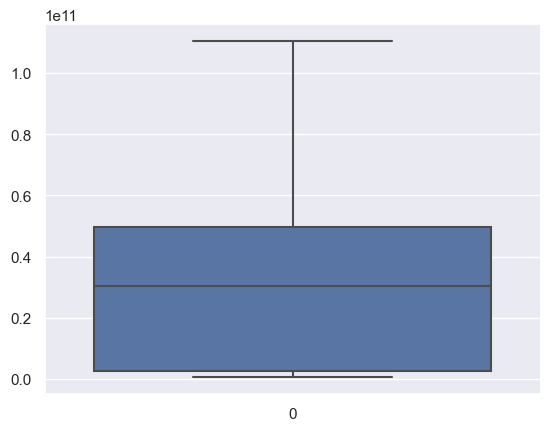

In [21]:
#rango de los capitales de mercado
sns.boxplot(df['market_caps'])

<Axes: >

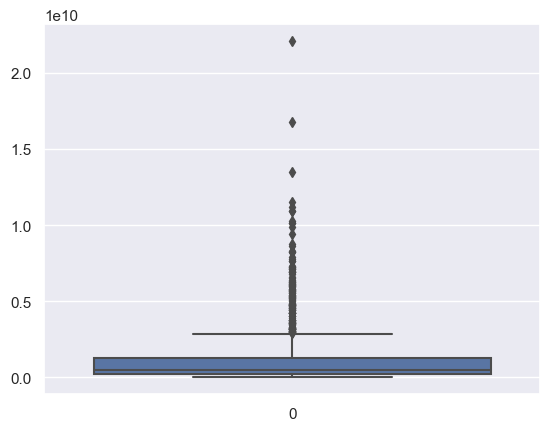

In [24]:
#rango de los volumenes
sns.boxplot(df['total_volumes'])

<Axes: >

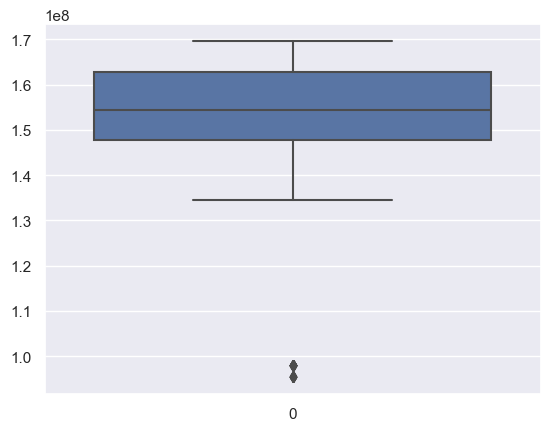

In [27]:
#rango de los tokens en circulacion
sns.boxplot(df['Circulating supply'])

#### *Se observa una cantidad considerable de outliers en la variable* `total_volumes` 

Estos outliers representan las anomalias del mercado que ocurrieron en el periodo de tiempo
del dataset, esto es comun es todas las criptos, se ha visto en toda su historia que causas externas
pueden afectar al precio.

In [31]:
df['total_volumes'].describe()

count    1.826000e+03
mean     1.050844e+09
std      1.615325e+09
min      7.692710e+06
25%      2.212355e+08
50%      4.540906e+08
75%      1.285280e+09
max      2.210352e+10
Name: total_volumes, dtype: float64

## Analisis multivariable

Text(0.5, 1.0, 'binancecoin Market_cap vs price')

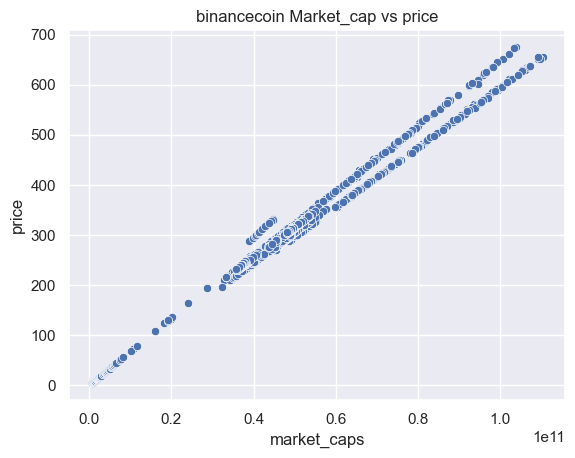

In [34]:
sns.scatterplot(data=df, x='market_caps', y='price').set_title(f'{moneda} Market_cap vs price')

Los precios y capitales de mercado tienen una alta dependencia

#### Hagamos un chequeo general de las relaciones entre las variables

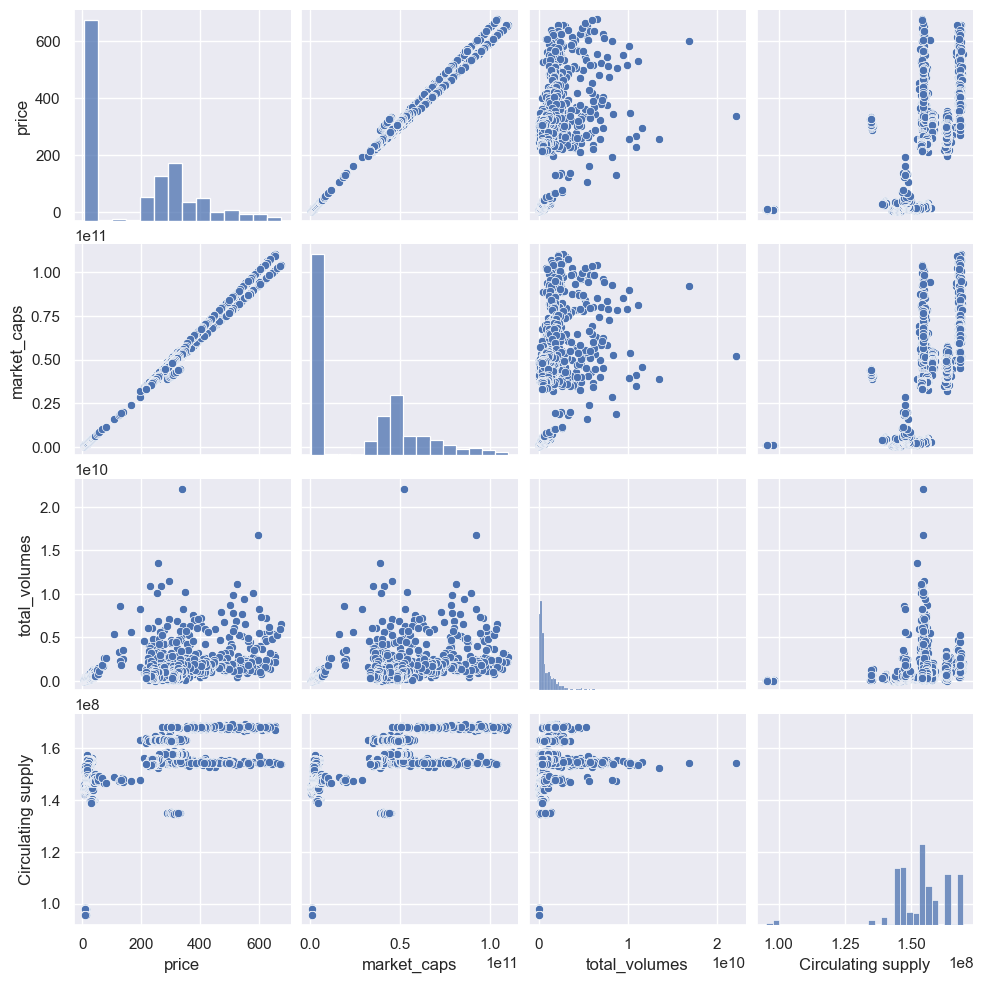

In [11]:
sns.pairplot(df)

## Tendencias del precio

Se analizaran las tendencias de precio de cada año registrado del precio 

In [15]:
df1 = df[df['time'] <= '2019-08-22 00:00:00' ]
df1

,time,price,market_caps,total_volumes,Circulating supply
0,2018-08-22 00:00:00,9.713726,9.533559e+08,1.281765e+07,9.814523e+07
1,2018-08-23 00:00:00,9.445565,9.257039e+08,2.384014e+07,9.800408e+07
2,2018-08-24 00:00:00,9.687857,9.497673e+08,1.854233e+07,9.803689e+07
3,2018-08-25 00:00:00,10.192204,9.993110e+08,2.322644e+07,9.804660e+07
4,2018-08-26 00:00:00,10.116143,9.918338e+08,1.924689e+07,9.804466e+07
...,...,...,...,...,...
361,2019-08-18 00:00:00,27.450449,4.270651e+09,1.805750e+08,1.555767e+08
362,2019-08-19 00:00:00,27.882349,4.336729e+09,2.026128e+08,1.555367e+08
363,2019-08-20 00:00:00,28.868525,4.490115e+09,2.214469e+08,1.555367e+08
364,2019-08-21 00:00:00,28.029166,4.357722e+09,2.013001e+08,1.554710e+08


Text(0.5, 1.0, 'binancecoinprice 2018-08-22 / 2019-08-22')

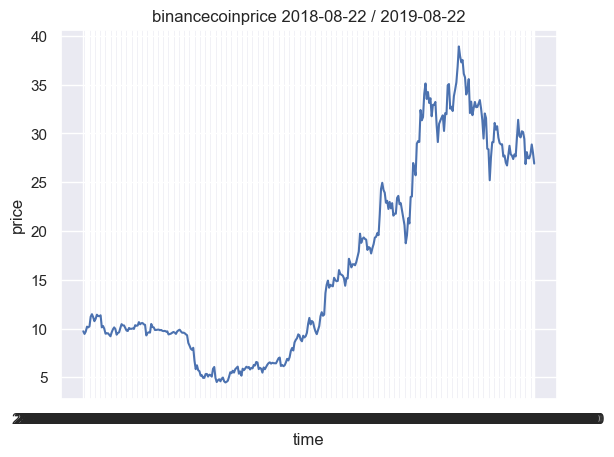

In [35]:
sns.lineplot(data=df1, x='time', y='price').set_title(f'{moneda} price 2018-08-22 / 2019-08-22')

Text(0.5, 1.0, 'binancecoin price 2019-08-22 / 2020-08-22')

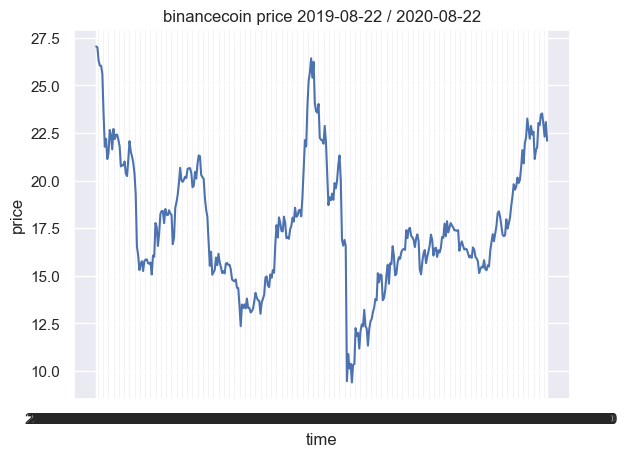

In [28]:
df2 = df[(df['time']> '2019-08-22 00:00:00') & (df['time']<= '2020-08-22 00:00:00')]
sns.lineplot(data=df2, x='time', y='price').set_title(f'{moneda} price 2019-08-22 / 2020-08-22')

Text(0.5, 1.0, 'binancecoin price 2020-08-22 / 2021-08-22')

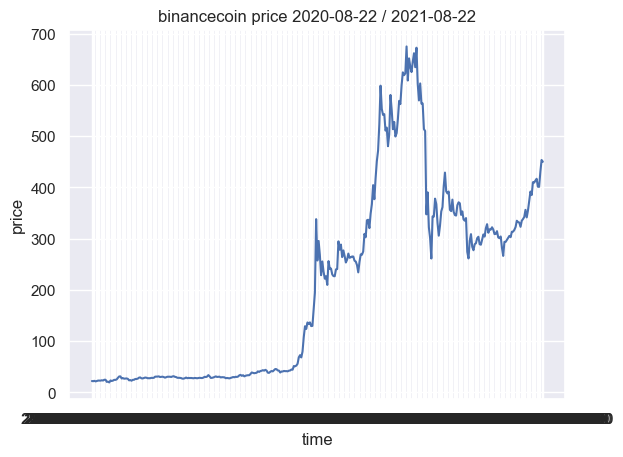

In [29]:
df3 = df[(df['time']> '2020-08-22 00:00:00') & (df['time']<= '2021-08-22 00:00:00')]
sns.lineplot(data=df3, x='time', y='price').set_title(f'{moneda} price 2020-08-22 / 2021-08-22')

Text(0.5, 1.0, 'binancecoin price 2021-08-22 / 2022-08-22')

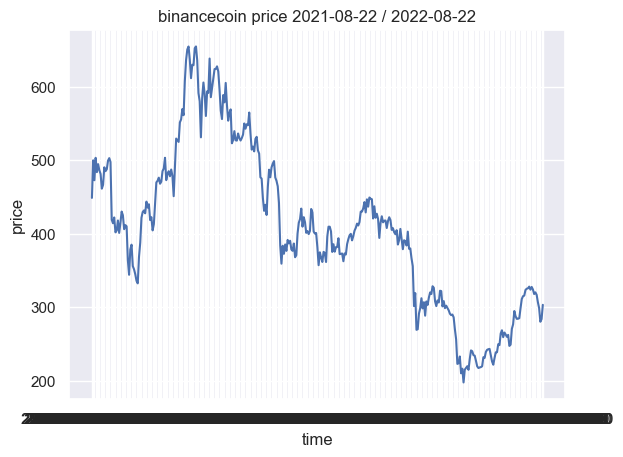

In [30]:
df4 = df[(df['time']> '2021-08-22 00:00:00') & (df['time']<= '2022-08-22 00:00:00')]
sns.lineplot(data=df4, x='time', y='price').set_title(f'{moneda} price 2021-08-22 / 2022-08-22')

Text(0.5, 1.0, 'binancecoin price 2022-08-22 / 2023-08-22')

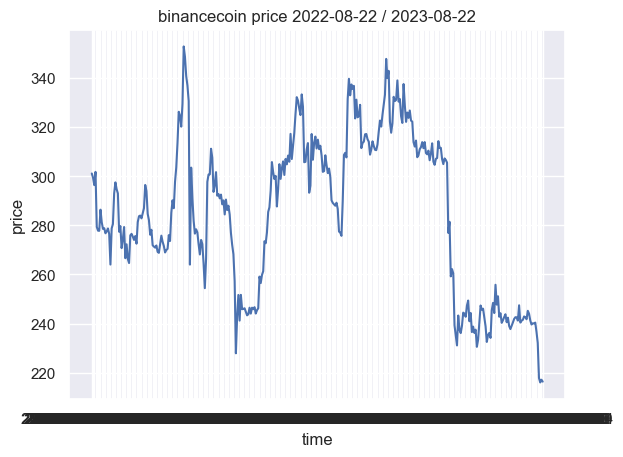

In [4]:
df5 = df[(df['time']> '2022-08-22 00:00:00') & (df['time']<= '2023-08-22 00:00:00')]
sns.lineplot(data=df5, x='time', y='price').set_title(f'{moneda} price 2022-08-22 / 2023-08-22')

Observaciones:
* en el ultimo año se vio un nivel fuerte de resistencia en el nivel de 340$ del precio
* el alto historico esta cerca de los 700$

<Axes: xlabel='market_caps', ylabel='Circulating supply'>

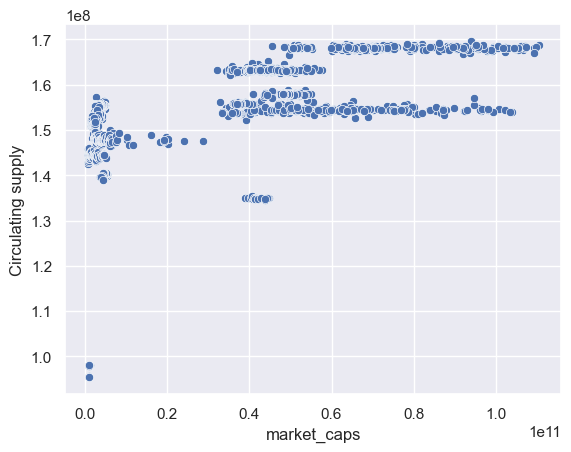

In [5]:
sns.scatterplot(data=df, x='market_caps', y='Circulating supply')

##### *Recordando la relacion precio_actual = market_cap / circulating_supply:*

Vemos que en este caso el BNB no ha variado mucho el ultimo año respecto a los tokens totales del
mercado, en cambio el capital de mercado si a tenido un mayor rango de variacion, pero aun asi muy 
por encima del `circulating supply`, esto indica que el ultimo año hubo bastante fluctuacion del precio
pero aun asi seguridad de inversion ya que el precio siempre podia mantenerse alto